# Restaurant Cost prediction

## 1. Problem Definition

With this project, we will develop a supervisory machine learning model to predict the cost of a meal for different restaurants across the country based on various features, though keep in mind that the same data can be used in multiple ways such that even to predict the rating of various restaurants or by the business owners to predict area-wide pricing, etc but for now let's just restrict to predicting prices.
It is also important to understand that there can multiple ways to solve this problem depending on the objective. We can use advanced techniques for univariate & bivariate analysis like statistical tests, feature engineering techniques like filter method, wrapper method or embedded methods and data imbalance treatment, etc would yield an even better result. For simplicity and learning I have kept my approach very simple and one step at a time.

Since our target variable i.e cost is continuous in nature hence we are going to build a regression model to solve our problem.

### Importing required libraries

Import all required libraries, though most commonly used libraries can be used using pyforest, and rest can be called upon when needed.

(To install pyforest simply run !pip install pyforest)

### Importing datasets

Download dataset from "https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects"

In [560]:
res_train = pd.read_excel('Restra_Data_Train.xlsx')

<IPython.core.display.Javascript object>

In [561]:
res_test = pd.read_excel('Restra_Data_Test.xlsx')

<IPython.core.display.Javascript object>

### Loading datasets

In [562]:
res_train.head() # Train dataset

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [563]:
res_test.head() # Test dataset

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


**About the Data Set:**
    
We have got here is training set & test set in excel format, consisting of-
- Training set:12,690  records

- Test set: 4,231 records


Columns/Features Details:
1. TITLE: The feature of the restaurant which can help identify what and for whom it is suitable.
2. RESTAURANT_ID: A unique ID for each restaurant.
3. CUISINES: The variety of cuisines that the restaurant offers.
4. TIME: The open hours of the restaurant.
5. CITY: The city in which the restaurant is located.
6. LOCALITY: The locality of the restaurant.
7. RATING: The average rating of the restaurant by customers.
8. VOTES: The overall votes received by the restaurant.
9. COST: The average cost of a two-person meal.

## 2. Data Analysis (Performing Exploratory Data Analysis)

If not the most critical I would term it as a decisive step in the project life cycle where we get to know characteristics of our dataset and to extract all possible information from it, which will, in turn, become the base of our strategy for cleaning & prepare our dataset for the showdown. Typically can use both graphical as well as numerical methods for our analysis.


### Now without dawdling let us dig deep into it, with first things first:


In [564]:
# Checking shape of Train  & Test dataset
res_train.shape,res_test.shape 

((12690, 9), (4231, 8))

Our training data has (12690, 9), test data has (4231, 8) rows and columns respectively. We can see that the test data set has one column less which is what we need to predict (COST) after training our model.


To analyze & process both datasets together we can concatenate them but before that let us add an Identifier as 'Test' & 'Train' to both datasets for the sake of identification.

In [565]:
# Adding a column for dataset identification
res_test['Identify']= 'Test'
res_train['Identify']='Train'
 # Concatinating both datasets
res = pd.concat([res_train,res_test], ignore_index = True)

<IPython.core.display.Javascript object>

Have a quick glimpse/check of our dataset sample.

In [566]:
res.sample(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,Identify
535,CASUAL DINING,3907,"North Indian, Chinese, Mughlai",11:59am – 12midnight (Mon-Sun),Noida,Sector 18,4.2,954 votes,1000.0,Train
3354,LOUNGE,14418,"North Indian, Chinese",12noon – 1am (Mon-Sun),Mumbai,Vile Parle East,4.5,311 votes,1000.0,Train
3391,QUICK BITES,11287,"Fast Food, Mithai",9am – 12midnight (Mon-Sun),Kochi,Edappally,-,NaN,200.0,Train
2574,CASUAL DINING,809,"Chinese, North Indian",1pm – 11:30pm (Mon-Sun),Hyderabad,Himayath Nagar,3.8,190 votes,400.0,Train
11569,QUICK BITES,4954,Desserts,10am – 11:30pm (Mon-Sun),Kochi,Vyttila,-,NaN,400.0,Train


This tells us that features like Title, cuisines, time, votes carry multiple information in the same column separated by various delimiters.


Checking dataset for some key details like the presence of null values and data type which will need to be addressed further downstream 

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
Identify            0
dtype: int64
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   Identify       16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory us

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

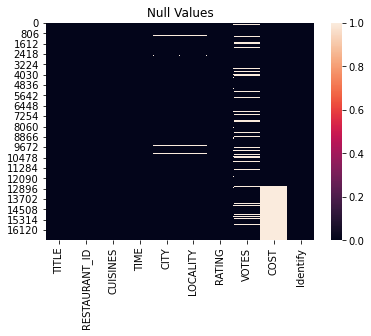

In [567]:
# Dataset info exraction
print(res.isnull().sum())
print('X'*80)
print(res.info())
print('X'*80)
sns.heatmap(res.isnull())
plt.title('Null Values')
plt.show()

We can see that 

- CITY, LOCALITY, RATING, VOTES, COST columns are with null values wherein COST null values are coming from concatenating test dataset(confirmed by heat map all null values are in the lower part).

- Restaurant_ID is a unique value for each restaurant hence can be dropped.

- RESTAURANT_ID has an int data type, COST has a float data type. Rests all features have an object data type.

Now we are gonna dissect the features in detail and check for possible information that can be extracted, 

Define a function & passing on all features by a loop will give us all necessary details

In [568]:
# Function to analyse columns
def cat_ana(df, x = None):
    series = df[x]
    print(f'Deatils of Feature {x} are: ')
    print(f'Stats summary \n{series.describe()}')
    print('+' *80)
    print(f'Null values \n{series.isnull().sum()}')
    print('+' *80)
    print(f'Series value count is \n{series.value_counts()}')
    print('+' *80)
    print(f'Unique values \n{series.unique()}')
    print('X' *80)

In [569]:
list = ['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES', 'COST']
for i in list:
    cat_ana(res, x = i)

Deatils of Feature TITLE are: 
Stats summary 
count           16921
unique            123
top       QUICK BITES
freq             5634
Name: TITLE, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Null values 
0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
QUICK BITES                     5634
CASUAL DINING                   4910
None                            1287
CAFÉ                             830
DESSERT PARLOR                   508
                                ... 
CASUAL DINING,DESSERT PARLOR       1
SWEET SHOP,CONFECTIONERY           1
BAKERY,FOOD COURT                  1
CAFÉ,FOOD COURT                    1
BAR,MICROBREWERY                   1
Name: TITLE, Length: 123, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK

## 3. EDA Concluding Remark.


#### We can sum up that:
- Our training dataset has -12690 rows, 9 columns and the test dataset has 4231 rows, 8 columns.

- CITY, LOCALITY, RATING, VOTES, COST columns are with null values wherein cost null values are coming from the test dataset.

- RESTAURANT_ID has an int data type, COST has a float data type. Rest All features have the object data type

- TITLE, CUISINES, CITY, RATING, VOTES, and LOCALITY has significant data with delimiters which shall be filtered out.

- **TITLE** : We can observe that the feature provide information regarding the types of cuisines like, Quick bites, Casual Dining, and cafe, etc, Though there are no null values, 1287 entries are None, 123 unique values are present, and has several entries that separated by "commas " indicating several restaurants serve multiple types of cuisines.

- **CUISINES** : We can observe that the feature provides information regarding the variety of cuisines served by them like, North Indian, Malwani, Seafood, Maharashtra, etc. The feature has no null values but 5183 unique entries, and like 'TITLE' it has several entries that are separated by "commas" indicating some restaurants serve significant varieties and some not so much.

- **VOTES** : As the name indicating the feature refer to the votes received by respective restaurants and as we know no. of votes is an indicative measure of restaurants' popularity. Has 1606 null values, 2076 unique values and a string 'votes' with a digit which shall be separated and data shall be retained only in numeric format int type.

- **TIME** : The data gives information on restaurant working time, 3295 unique entries, has several delimiters. Though working time may play a role in deciding the cost of meals but would be negligible compared to computational effort hence feature can be dropped.

- **RATING** : This column provides information about the restaurant rating, has no null values, 33 unique values some of which are strings like:
    A. 'NEW'(Maybe referring to New restaurants),
    B. '-' & 'nan' (Not available values),
    C. Like votes rating also play a considerable role in cost factoring for any restaurant.

- **CITY** : Indicates the city where restaurants are located, has 144 null values, 449 unique entries, and the most entries are miss-spelled, has localities included and highly mixed up data.

- **LOCALITY** : Locality where the restaurant is located and we can see that the no. of unique entries is very high.

## 4. Pre-Processing Pipeline

We are going to bellow mentioned methodology for addressing all the abnormalities we have detected in the EDA process:
- Restaurant_ID is a unique value for each restaurant hence can be dropped it reduces the randomness of the dataset.
- Time does not play much of a role in determining cost hence can be dropped.
- Splitting dataset features with the delimiters
- Replacing the whitespaces, string, special characters with a string obj 'MISSING'
- Replacing null values in rating with title wide(group by title) mean ratings assuming new restaurants would try to compete with restaurants offering similar types of cuisines.
- Regrouping all the city based on correct locality, spelling, and address

In [570]:
# Lets eliminate white spaces for the ease of processing data
list = ['TITLE','CUISINES','TIME','RATING','Identify', 'CITY','LOCALITY']
for i in list:
    res[i] = res[i].str.replace(' ', '')
    

# Preparing TITLE column
res_title = pd.DataFrame(res['TITLE'].str.split(',').tolist())
res_title.columns = ['Title_1',"Title_2"]
res_title.replace(['None',np.NaN], 'MISSING', inplace = True)



# Preparing the Cuisines column
res_cuisines = pd.DataFrame(res['CUISINES'].str.split(',').tolist())
res_cuisines. columns = ['Cuisine_1','Cuisine_2','Cuisine_3','Cuisine_4','Cuisine_5','Cuisine_6','Cuisine_7','Cuisine_8']
res_cuisines.replace(['None',np.NaN,''], 'MISSING', inplace = True)



# Preparing Votes column
res['VOTES']=res['VOTES'].astype(str)
res_votes = pd.DataFrame(res['VOTES'].str.split(' ').tolist())
res_votes.columns = ['Votes_1','Votes_2']
res_votes.replace(['None',np.NaN,'','nan'], 'MISSING', inplace = True)



# Preparing Rating column
res['RATING'].replace(['None',np.NaN,'-','nan'], np.NaN, inplace = True)



# Reorganizing city column
res['CITY'] = res['CITY'].astype(str)
res['CITY'].replace(['UttarPradesh','Telangana','TamilNadu','Kerala','Karnataka','Maharashtra','India','nan',
                     'NearRelianceFresh','OuterRingroad'], 'MISSING', inplace = True)
res['CITY'].replace(['IOBBankKamalaNagar','WestMaredpally','Secunderbad','Secunderabad.','Secunderabad.WEHAVENOBRANCHES.',
                     'SecunderabadECIL','SecunderabadmainroadnearsignalNMRECCOLLEGE'],'Secunderabad', inplace = True)
res['CITY'].replace(['Kerala682018','Kerala682028','682036','Vyttila','AluvaCircle','Thykoodam','Thykoodam','Kerala682021',
                     'Kerala682015','Kerala682022',
                     'Kerala682305','Kerala682018' 'Kerala682028','Kerala682024','Kerala682304', 'Kerala682001India',
                     'MGRoadErnakulam','Ernakulam','Kerala682036',682024,'682035.',682036],'Ernakulam', inplace = True)
res['CITY'].replace(['Pallimukku','Elamakkara','PanampillyNagar','Perumbavoor','Palarivattom','p.oKochi','Nedumbassery',
                     'chullickal','KochiPanampillyNagar','aluvacircle','Aluva', 'KochiAluva102', 'FortKochi','Kochi-16',
                     'KochiInternationalAirportVIPRoad' ,'KochiKakkanad','Kochi-18' ,'KochiRavipuram','kochi',
                     'Kerala682013','Kerala683104','Kochi.','KochiChullickal','Kochi-683101' ,'Kaloor','KochiPalarivattom',
                     'KochiVyttila','PonnuruniKochi','KochiElamkulam','ErnakulamCirclekochi'],'Kochi', inplace = True)
res['CITY'].replace(['NoidaExtention','Sector-6Noida201301','NearSector110Noida','GreaterNoida','Sector51Noida'],
                    'Noida', inplace = True)
res['CITY'].replace(['Kukatapally','BKGuda','Champapet','Lingampally','Dilsukhnagar','Kukatpally','Attapur.',
                     'RajivgandhiNagar','Telangana500003','HitechCity','Madhapur','Gandipet','Mehdipatnam' ,'Kondapur',
                     'Telangana500027','Hyderaba','Nizampet',
                     'HyderabadManikonda', 'Manikonda','BegumpetHyderabad','Begumpet','Telangana500081','hyderabad',
                     'JubileeHills','Telengana','BanjaraHills','GachibowliHyderabad','NearSantoshBanjaraHyderabad',
                     'Hyderabad-500032','Telangana500032','Telangana500034','Hyderabad.','HyderabadBehindVacsPastries',
                     'Hyderabadneerusemporium.','Gachibowli','Kothaguda',
                     'TelaganaLandLine:040-48507016'],'Hyderabad', inplace = True)
res['CITY'].replace(['Nungambakkam','AndavarNagar','Kolathur','OMRKarapakkam','Potheri','NallathambiMainRoad','SathyaNagar'
                     ,'Medavakkam','Perungudi','Pallavaram' ,'Velachery','BesantNagar','ChennaiVelachery','chennai',
                     'Chennai-34Landmark-NearLoyolaCollege','AnnaNagarWest','ChennaiMahabalipuram','Mahabalipuram' ,
                     'ChennaiOpposite5CBusstand' ,'ChennaiPadur','Chennai40','ChennaiInjambakkam', 
                     'BalavinayagarNagarChennai','T-NagarChennai','Chennai-600018','chennai-119',
                     'Chenna','ChennaiKovalam','Chennaiopp:Vasanth&co',
                     'Mogappair.Chennai', 'ChennaiPerungudi', 'ChennaiThuraipakkam', 'ChennaiThousandLights',
                     'Chennai-600107','ECRNEELANKARAIChennai600115', 'Chennai.', 'Chennai(BangOppositeIndianBank)',
                     'Chennai-40', 'ChennaiChrompet','Chennai.(NearHotelMatshya)','AnnaNagarEast' ,
                     'Sholinganallur.Chennai','Chennai(AboveBombayBrasserie)' ,'Chennai37','Chennai600040',
                     'Chennai-600008','Chennai-600040','Chennai600034.','Arumbakkamchennai-600106.','DewanRamaRoad',
                     'Semmancheri','ChennaiTeynampet'],'Chennai', inplace = True)
res['CITY'].replace(['GurgaonHaryana','NewDelhi110011','Gurugram','RodeoDriveSector49',
                     'PVRplazacinemabuildingConnaughtPlace','NewDelhi110075',
                     'Amritkaurmarketoppositenewdelhirailwaystationpaharganj','Gurgoan','Faridabd','DLFGalleria',
                     'Kalkaji','Delh.','NewDelhi110011''GurgaonHaryana','Janakpuri','Dist.CenterNewDelhi' ,
                     'IndiaGateNewDelhi','Girgaum',
                     'GreaterKailash1(GK1)NewDelhi','Haryana','Gurgaon','VaishaliGhaziabad','Sector7Dwarka',
                     'GurgaonHaryanaIndia','NewDelhi..NearbySBIbank','NearRamlilaGround','OldDelhi',
                     '6&7-4/64SubhashNagar','AshokViharPhase1','Saket','Pitampura','ChanderNagarNewDelhi',
                     'NewDelhi.','NewDelhi-110024','GreaterKailash2NewDelhi','Delhi110085',
                     'KarolBagh','Rohini','DelhiNCR','Dwarka','oppgurudwaraShakurpur','Delhi'],'NewDelhi', inplace = True)
res['CITY'].replace(['B.B.M.PEast(Karnataka)-560049','Karnataka560037','Karnataka560043' ,'Karnataka560102','SGPalya',
                     'ThammenahalliVillage','Karnataka560103','HBRLayout',
                     'Sarjapur','BTMLayout','VijayaNagar','RajarajeshwariNagarbangalore','JPNagar', 'Marathahalli' ,
                     'KanakapuraRoadBanglore','Banglaore','Bangalorelandmarkabovemahaveerhardware','Phase1Bangalore',
                     'Bangalore560076',
                     'MalleshwaramBangalore', 'BangaloreRoad', 'KadubesanahalliBangalore','Whitefield','Bangalore-560095',
                     'Bangalore-560103','BrigadeRoad','HSRLayout' ,'OffBrigadeRoad','Banaswadi(NexttoIndianBank)Bangalore',
                     'BTMBangalore','BangaloreKoramangala7thBlock','bangalore:560085',
                     'CPRlayoutharlurmainroadoppositetoozoneevergreenapartmentBangalore-','HosurRoad','Bangalore.',
                     'Bangalore-560076', 'JPNagarBangalore','WhitefieldBangalore','Banglore',
                     'Bengaluru','Bengalore','5thMainTeachersColonyKoramangalaBlock1Bangalore560034', 'Bangalor',
                     'Bangalore-560066'],'Bangalore', inplace = True)
res['CITY'].replace(['Maharashtra400102','Maharashtra400092','Maharashtra400092','NaviMumbai.','MumbaiMahim','DombivaliEast'
                     ,'Kandivali','Thane','oppmukteshwarashrampowai','Rajanpada','PokhranRoad2','MulundWest','Chowpatty',
                     'VirarMumbai','ChurchStreet','MumbaiVeeraDesaiArea','MumbaiUlhasnagar',
                     'JogeshwariWestMumbai','Miraraodeast','MumbaiChakala','BorivaliWest','Mumbai400070','KandivaliWest',
                     'Thane(W)','ThaneWest','ThaneWestThaneWest''NearAndheriWestStation','ThaneMumbai',
                     'Jogeshwari(w)Mumbai','MumbaiChakala','BorivaliWest','BorivaliEast.' ,'WestMumbai','navimumbai',
                     'VasaiWest.','Mahim','GrantRoadWest','Mumbai-400007','NayaNagarMiraRoad','LowerParel','Mumbai.',
                     'MumbaiAndheriEast', 'VirarWest','MarineDrive','Bhayandar''Khar(west)','kharwest',
                     'MumbaiDombivaliEast','Powai','KalyanWest','GrantRoadWest','Mumbai-400007','NayaNagarMiraRoad',
                     'LowerParel','Mumbai.','MumbaiAndheriEast', 
                     'VirarWest','MarineDrive','Bhayandar','Khar(west)','kharwest','MumbaiDombivaliEast','Powai',
                     'Mumbai-400013','AndheriwestMumbai','BandraW','Mumbai-80','AndheriLokhandwala.','EastMumbai',
                     'Kalyan','BadlapurWest.','LowerParelWest','Navi-Mumbai' ,'Mulundwest',
                     'MumbaiThisisaDelivery&Take-awayRestaurantonly.','Vasaiwest','BorivaliWest.''GolfCourseRoad',
                     'KharMumbai','VasaiMumbai','NearAndheriEastStation', 'MiraRoadThaneMumbai',
                     'Kurla(W)','Mumbai400015','Dombivli', 'MohammadAliRoadMumbai','KurlaMumbai','MumbaiMumbra',
                     'Miumbai','Borivali(W)Mumbai:400092.' 'DombivaliEast','Kandivali''MumbaiMahim',
                     'Powai(NexttoPowaiPlaza)','MulundEast','GoregaonWest','Chembur.','AndheriLokhandwala',
                     'AndheriWest','MaladEast','BandraWest','Borivali(W)Mumbai:400092.'],'Mumbai', inplace = True)


# combining all dataframes:
res_total = pd.concat([res,res_title,res_cuisines,res_votes], axis =1)
# Droping duplicated information
res_total.drop(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME','VOTES','Votes_2','LOCALITY'],axis = 1, inplace =True)


# Filling null values in rating with title wide mean assuming new restaurants would try to compete with restaurants of 
# similar types
res_total['RATING'] = (res_total.groupby('Title_1')).transform(lambda x: x.fillna(x.mean()))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [571]:
# Encoding the required Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
val = ['CITY', 'RATING','Title_1', 'Title_2', 'Cuisine_1', 'Cuisine_2', 'Cuisine_3','Cuisine_4', 'Cuisine_5', 'Cuisine_6', 'Cuisine_7', 'Cuisine_8', 'Votes_1']
for i in val:
    res_total[i] = le.fit_transform(res_total[i].astype(str))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

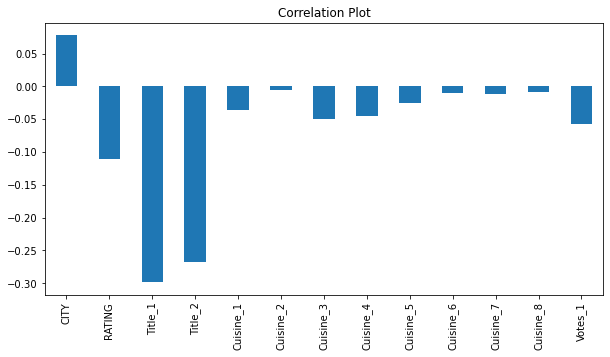

In [572]:
# Checking Coorelation
res_total.drop(['COST'],axis=1).corrwith(res_total['COST']).plot(kind ='bar', figsize =(10,5))
plt.title('Correlation Plot')
plt.show()

It can be noted that Cost has best positive correlation with City only where as best negative correlation with Title & rating, votes & cuisines

In [573]:
#droping less correlated data.
res_total.drop(['Cuisine_1','Cuisine_2', 'Cuisine_3', 'Cuisine_4', 'Cuisine_5', 'Cuisine_6','Cuisine_7', 'Cuisine_8',],axis = 1, inplace =True)

## 5. Building Machine Learning Models.

**Coming to the final stage, we will:**

- Import all algorithms from respective libraries
- Split data back in training data & test data based on an identifier assigned earlier, 
- Check for the best random state & best algorithm which can be modeled.
- Once we get the best random state & the algorithm we can, hypertune parameters, build and train our model
- Finally, save it as object file & reload when required to predict.
- Ultimately putting model to use.

In [574]:
#Importing required libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [575]:
# Segrigating data into x & y
train = res_total.loc[res_total['Identify']== 'Train']
test = res_total.loc[res_total['Identify']== 'Test']
x = train.drop(['COST','Identify'], axis = 1)
y = train['COST']
testy = (test.drop(['COST','Identify'], axis = 1))

In [576]:
# identifying best random state
best_random_state = 0
accu = 0
for i in range(30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    r2s = r2_score(y_test,predlr)
    if r2s > accu:
        accu = r2s
        best_random_state = i
        
        
print(f'The best random state is {best_random_state} with accuracy is {accu *100}%')

The best random state is 67 with accuracy is 18.71162637558761%


In [577]:
#Identifying best Algorithm
import warnings
warnings.filterwarnings('ignore')
models=[LinearRegression(),Lasso(alpha =0.001),Ridge(alpha =0.001),ElasticNet(alpha =0.001), RandomForestRegressor(),
      AdaBoostRegressor(), DecisionTreeRegressor(), XGBRegressor(), GradientBoostingRegressor()]
for m in models:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 67)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} R2 Score is {r2_score(y_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr Error is {mean_squared_error(y_test,pred)*100}')
    print(f'For algorithm {m} mean abs. error is {mean_absolute_error(y_test,pred)*100}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between r2 score & cv score = {(r2_score(y_test,pred)*100)-(cv_score*100)}\n')
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

For algorithm LinearRegression() R2 Score is 18.71162637558761
For algorithm LinearRegression() mean Sqr Error is 28818112.316950697
For algorithm LinearRegression() mean abs. error is 32284.921896674365
For algorithm LinearRegression() cross validation score is 15.375217553828492
Difference between r2 score & cv score = 3.336408821759118

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Lasso(alpha=0.001) R2 Score is 18.71162345821331
For algorithm Lasso(alpha=0.001) mean Sqr Error is 28818113.351209547
For algorithm Lasso(alpha=0.001) mean abs. error is 32284.924080246798
For algorithm Lasso(alpha=0.001) cross validation score is 15.375217369309082
Difference between r2 score & cv score = 3.336406088904228

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For algorithm Ridge(alpha=0.001) R2 Score is 18.71162636724374
For algorithm Ridge(alpha=0.001) mean Sqr Error is 28818112.31990

In [578]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'booster':['gbtree', 'gblinear','dart']}
clf = GridSearchCV(XGBRegressor(),parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'booster': 'dart'}
0.9146671346985793


In [579]:
# Model Building
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 67)
xgbr = XGBRegressor(booster ='dart')
xgbr.fit(x_train,y_train)
pred = xgbr.predict(x_test)
cv_score = cross_val_score(xgbr,x,y,cv= 10).mean()
print(f'R2 Score is {round(r2_score(y_test,pred)*100)}%')
print(f'Mean Sqr Error is {round(mean_squared_error(y_test,pred)*100)}%')
print(f'Mean abs. error is {round(mean_absolute_error(y_test,pred)*100)}%')
print(f'Cross validation score is {round(cv_score*100)}%')
print(f'Difference between r2 score & cv score = {(r2_score(y_test,pred)*100)-(cv_score*100)}\n')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

R2 Score is 94.0%
Mean Sqr Error is 2131228.0%
Mean abs. error is 1973.0%
Cross validation score is 90.0%
Difference between r2 score & cv score = 3.621327555495185

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### Saving the Model

We can save our trained model using joblib library and recall it when needed

In [580]:
import joblib
joblib.dump(xgbr,'Restaurant_cost_pred.obj')

['Restaurant_cost_pred.obj']

In [581]:
rcp = joblib.load('Restaurant_cost_pred.obj')

In [582]:
ypred = rcp.predict(testy)

In [583]:
ypred=pd.DataFrame(ypred)

<IPython.core.display.Javascript object>

In [584]:
ypred.to_csv('Pred_restaurant_cost.csv')

In [585]:
y_ts = rcp.predict(x)

In [586]:
print('R2 Score = ',r2_score(y,y_ts)*100)
print(f'Mean Sqr Error = {mean_squared_error(y_test,pred)*100}')
print(f'Mean abs. error = {mean_absolute_error(y_test,pred)*100}')

R2 Score =  98.76116855968947
Mean Sqr Error = 2131228.2324623903
Mean abs. error = 1973.0648411720736


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

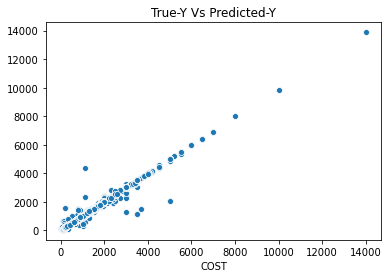

In [637]:
sns.scatterplot(y,y_ts)
plt.title('True-Y Vs Predicted-Y')
plt.show()

## 6. Concluding Remarks.
With XGBoost Regressor we can achieve a CV score of 90%, MSE of 2131228 and MAE of 1973. Though the accuracy is satisfactory for a general business problem since our model can predict value within an error of ± 10% but has room for improvement since mean square error & mean absolute errors are high. This indicates dataset can still be filtered.